In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
data=pd.read_csv('Ads_CTR_Optimisation.csv')
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## dummy data

In [22]:
import random
N=300; #10000
ads=10;
ads_selected=[];

Ni_0=np.zeros(ads,dtype=int);
Ni_1=np.zeros(ads,dtype=int);
total_rewards=0;

for round in range(N):
    ad=0;
    max_random=0; 
    
    #gives the ad having the maxm random draw. selects a random
    #datapoint withing the distribution range of all ads
    for i in range(ads):
        random_beta=random.betavariate(Ni_1[i]+1,Ni_0[i]+1);
        # beta function takes two parameter m=no of success n= number of failures
        #this function returns a random data point from the distribution
        if(random_beta>max_random):
            max_random=random_beta;
            ad=i;
    ads_selected.append(ad);
    feedback=data.values[round,ad]
    
    #if the reward is 1 , m is increasing -> distribution moves towards 1
    #if the reward is 0 , n is increasing -> distribution moves towards 0
    if(feedback==1):
        Ni_1[ad]+=1;
    else:
        Ni_0[ad]+=1;
    total_rewards+=feedback;

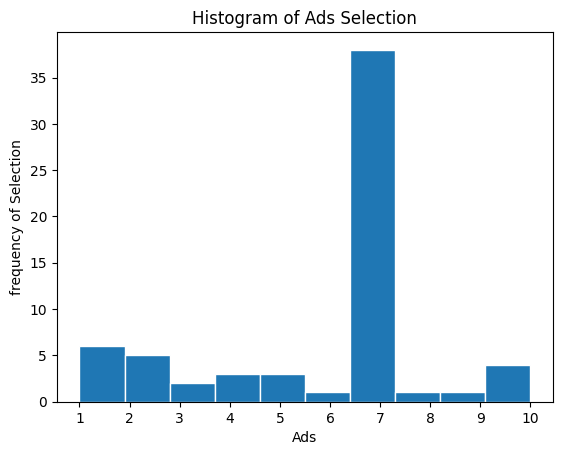

In [29]:
plt.title('Histogram of Ads Selection');
plt.xlabel('Ads');
plt.ylabel('frequency of Selection');
plt.xticks(np.arange(0,10));
plt.hist(ads_selected,bins=10,edgecolor='white');
plt.gca().set_xticklabels(np.arange(1, 11)) 
plt.show();

#able to predict the ad with highest conversion rate after 300 rounds

## user input feedbacks

In [34]:
n=1000;  # total no of rounds=10000
ads=int(10);
Ni=np.zeros(ads,dtype=int);
Ri=np.zeros(ads,dtype=int);
ads_selected=[];
total_rewards=0;
threshold=n*0.02
user_feedback=np.zeros(ads,dtype=int); #for each round
#step 2
import math
for round in range(n):
    #user selecting the ad
    
    ad=0;
    maxUCB=0;
    for i in range(ads):
        if(Ni[i]>0):
            avgReward=(Ri[i]/Ni[i]);
            error=math.sqrt((3/2)*(math.log(round+1)/Ni[i]));
            LCB=avgReward-error
            UCB=avgReward+error
        else:
            UCB=1e400
            
        #step 3 
        if(UCB>maxUCB):
            maxUCB=UCB;
            ad=i;
            
    #step4 
    ads_selected.append(ad);
    Ni[ad]+=1
    # taking user input
    #feedback=data.values[round,ad]
    try:
        feedback=int(input(f"Round :{round+1} : What is you feedback for ad {ad+1} (0/1)"))
    except:
        break
    Ri[ad]+=feedback
    total_rewards+=feedback  
    print(f"Total rewards after round {round + 1}: {total_rewards}")

    #step-5 
    #stopping conditionn
    if(Ni[np.argmax(Ni)]>threshold):
        print(f"The most clicked ad is ad {np.argmax(Ni) + 1}. Stopping after {round + 1} rounds.")
        break

Round :1 : What is you feedback for ad 10 (0/1)0
Total rewards after round 1: 0
Round :2 : What is you feedback for ad 6 (0/1)1
Total rewards after round 2: 0
Round :3 : What is you feedback for ad 2 (0/1)1
Total rewards after round 3: 1
Round :4 : What is you feedback for ad 9 (0/1)1
Total rewards after round 4: 2
Round :5 : What is you feedback for ad 6 (0/1)1
Total rewards after round 5: 3
Round :6 : What is you feedback for ad 6 (0/1)1
Total rewards after round 6: 4
Round :7 : What is you feedback for ad 2 (0/1)1
Total rewards after round 7: 5
Round :8 : What is you feedback for ad 8 (0/1)1
Total rewards after round 8: 6
Round :9 : What is you feedback for ad 6 (0/1)0
Total rewards after round 9: 7
Round :10 : What is you feedback for ad 2 (0/1)0
Total rewards after round 10: 7
Round :11 : What is you feedback for ad 7 (0/1)0
Total rewards after round 11: 7
Round :12 : What is you feedback for ad 6 (0/1)00
Total rewards after round 12: 7
Round :13 : What is you feedback for ad 9 (0

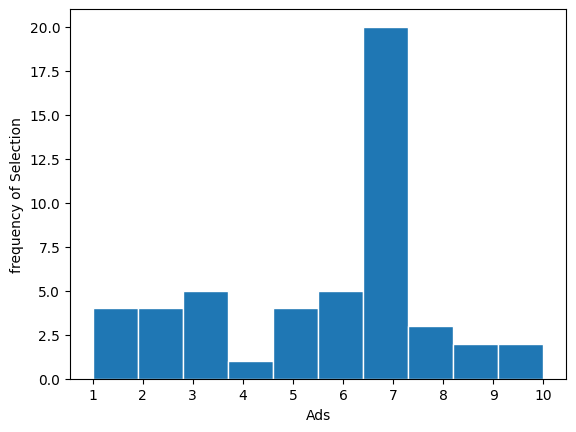

In [31]:
# plt.title('Histogram of Ads Selection');
plt.xlabel('Ads');
plt.ylabel('frequency of Selection');
plt.xticks(np.arange(0,10));
plt.hist(ads_selected,bins=10,edgecolor='white');
plt.gca().set_xticklabels(np.arange(1, 11)) 
plt.show();

In [32]:
# Find the ad with the highest frequency
ad_counts = np.bincount(ads_selected)
max_ad_count = np.max(ad_counts)
max_ad_index = np.argmax(ad_counts)

print(f"The ad with the highest clicking rate is ad {max_ad_index+1} with {max_ad_count} selections.")

The ad with the highest clicking rate is ad 7 with 20 selections.
